In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
%matplotlib inline

In [2]:
column=['Type',
    'shape2D_Elongation', 'shape2D_MajorAxisLength', 'shape2D_MaximumDiameter', 'shape2D_MeshSurface', 'shape2D_MinorAxisLength',
    'shape2D_Perimeter', 'shape2D_PerimeterSurfaceRatio', 'shape2D_PixelSurface', 'shape2D_Sphericity', 'firstorder_10Percentile',
    'firstorder_90Percentile', 'firstorder_Energy', 'firstorder_Entropy', 'firstorder_InterquartileRange', 'firstorder_Kurtosis',
    'firstorder_Maximum', 'firstorder_MeanAbsoluteDeviation', 'firstorder_Mean', 'firstorder_Median', 'firstorder_Minimum',
    'firstorder_Range', 'firstorder_RobustMeanAbsoluteDeviation', 'firstorder_RootMeanSquared', 'firstorder_Skewness',
    'firstorder_TotalEnergy', 'firstorder_Uniformity', 'firstorder_Variance']

In [3]:
malignant=np.load(r'C:\zach\archive\FeatureVectors\MalignantVectors.npy')
benign=np.load(r'C:\zach\archive\FeatureVectors\BenignVectors.npy')
malignant_tag=np.ones(len(malignant))
benign_tag=np.zeros(len(benign))

In [4]:
def compile_data():
    types=np.append(malignant,benign, axis=0)
    tagss=np.append(malignant_tag,benign_tag, axis=0)
    data=[]
    for i in range(len(types)):
        data.append(np.insert(types[i], 0, tagss[i],axis=0))
    data=np.array(data)
    df=pd.DataFrame(data, columns=column)
    df = df.astype({'Type': np.int32})
    return df

In [5]:
#Compile data into Pandas Dataframe
dtfrm=compile_data()
dtfrm_mal=dtfrm.head(len(malignant))
dtfrm_ben=dtfrm.tail(len(benign))
dtfrm

,Type,shape2D_Elongation,shape2D_MajorAxisLength,shape2D_MaximumDiameter,shape2D_MeshSurface,shape2D_MinorAxisLength,shape2D_Perimeter,shape2D_PerimeterSurfaceRatio,shape2D_PixelSurface,shape2D_Sphericity,...,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance
0,1,0.571723,456.303841,446.444845,90993.5,260.879294,1404.631601,0.015437,90995.0,0.761286,...,71.130754,64.0,0.0,214.0,20.522261,79.846107,0.879446,580129601.0,0.215104,1315.816630
1,1,0.801915,95.224075,103.580886,5468.5,76.361616,338.551299,0.061909,5469.0,0.774309,...,69.966356,60.0,0.0,252.0,15.026451,81.942869,2.031765,36722332.0,0.265083,1819.342807
2,1,0.408152,229.192759,240.251951,15908.5,93.545553,668.457936,0.042019,15909.0,0.668876,...,97.758753,90.0,21.0,234.0,28.285225,108.199144,0.722563,186247534.0,0.160649,2150.280979
3,1,0.582694,416.648950,483.718927,68530.5,242.778995,1641.040764,0.023946,68531.0,0.565493,...,41.125651,37.0,0.0,196.0,17.705620,51.357013,0.848303,180753444.0,0.264880,946.223593
4,1,0.692898,361.827147,398.436946,63799.5,250.709256,1389.543289,0.021780,63800.0,0.644379,...,37.195643,30.0,0.0,203.0,17.795719,48.404103,1.059669,149480666.0,0.294196,959.441316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0,0.662402,342.168526,343.139913,60694.0,226.653172,982.146320,0.016182,60695.0,0.889204,...,37.296301,28.0,0.0,214.0,14.933838,50.135834,1.766488,152563063.0,0.312121,1122.587747
661,0,0.613046,317.911657,316.753848,48232.5,194.894343,875.553391,0.018153,48233.0,0.889185,...,70.960401,62.0,3.0,252.0,16.071811,80.589989,1.753217,313261097.0,0.249849,1459.367826
662,0,0.625565,213.796753,217.494828,22231.0,133.743692,595.487373,0.026786,22232.0,0.887589,...,94.075522,76.0,0.0,235.0,37.410951,109.669267,0.614280,267392003.0,0.146501,3177.144305
663,0,0.480373,561.084889,557.624426,118438.5,269.530003,1429.460028,0.012069,118440.0,0.853453,...,34.316599,23.0,0.0,250.0,12.172763,52.387881,2.786504,325057400.0,0.376622,1566.861062


In [6]:
#Make a holdout set of the starting data (67 samples)
x_train, x_test, y_train, y_test = train_test_split(dtfrm.drop('Type', axis=1), dtfrm['Type'], test_size=0.1,random_state=0)

In [7]:
model1=GaussianNB()
model2=LogisticRegression(solver='liblinear')
model3=RandomForestClassifier(random_state=0)
model4=KNeighborsClassifier()
model5=DecisionTreeClassifier(random_state=0)
model6=XGBClassifier(use_label_encoder=False,eval_metric='logloss')
models=[model1,model2,model3,model4,model5,model6]

In [8]:
for i in models:
    cv_results = cross_validate(i, x_train, y_train, cv=10, scoring=('roc_auc','accuracy','recall'))#need to add recall(sensitivity)
    print(str(i).split('(')[0]+': ')
    print('   Test accuracy: {}% (±{}%)'.format(np.round(100*np.mean(cv_results['test_accuracy']),3),np.round(100*np.std(cv_results['test_accuracy']),3)))
    print('   Area under ROC: {}%'.format(np.round(100*np.mean(cv_results['test_roc_auc']),3)))
    print('   Sensitivity: {}%'.format(np.round(100*np.mean(cv_results['test_recall']),3)))

GaussianNB: 
   Test accuracy: 71.898% (±3.919%)
   Area under ROC: 77.689%
   Sensitivity: 36.553%
LogisticRegression: 
   Test accuracy: 55.873% (±6.929%)
   Area under ROC: 55.63%
   Sensitivity: 51.658%
RandomForestClassifier: 
   Test accuracy: 91.46% (±3.817%)
   Area under ROC: 96.26%
   Sensitivity: 78.921%
KNeighborsClassifier: 
   Test accuracy: 71.585% (±4.775%)
   Area under ROC: 71.976%
   Sensitivity: 47.921%
DecisionTreeClassifier: 
   Test accuracy: 90.802% (±3.897%)
   Area under ROC: 90.271%
   Sensitivity: 88.737%
XGBClassifier: 
   Test accuracy: 96.494% (±2.405%)
   Area under ROC: 98.45%
   Sensitivity: 91.816%


In [9]:
# Sorted features by Variance for both types of tumors
dct_mal={}
dct_ben={}
for i in column:
    dct_mal[i]=dtfrm_mal[i].var()
    dct_ben[i]=dtfrm_ben[i].var()
print(sorted(dct_mal, key=dct_mal.get),'\n')
print(sorted(dct_ben, key=dct_ben.get))

['Type', 'shape2D_PerimeterSurfaceRatio', 'shape2D_Sphericity', 'firstorder_Uniformity', 'shape2D_Elongation', 'firstorder_Entropy', 'firstorder_Skewness', 'firstorder_Kurtosis', 'firstorder_RobustMeanAbsoluteDeviation', 'firstorder_MeanAbsoluteDeviation', 'firstorder_Minimum', 'firstorder_InterquartileRange', 'firstorder_10Percentile', 'firstorder_RootMeanSquared', 'firstorder_Mean', 'firstorder_Median', 'firstorder_Range', 'firstorder_Maximum', 'firstorder_90Percentile', 'shape2D_MinorAxisLength', 'shape2D_MajorAxisLength', 'shape2D_MaximumDiameter', 'shape2D_Perimeter', 'firstorder_Variance', 'shape2D_PixelSurface', 'shape2D_MeshSurface', 'firstorder_Energy', 'firstorder_TotalEnergy'] 

['Type', 'shape2D_PerimeterSurfaceRatio', 'shape2D_Sphericity', 'firstorder_Uniformity', 'shape2D_Elongation', 'firstorder_Entropy', 'firstorder_Skewness', 'firstorder_Kurtosis', 'firstorder_RobustMeanAbsoluteDeviation', 'firstorder_MeanAbsoluteDeviation', 'firstorder_InterquartileRange', 'firstorder

In [10]:
#Absolut relative distance of features between the two tumor types
dct_mean_dif={}
for i in column:
    dct_mean_dif[i]=np.abs(100*(dtfrm_mal[i].mean()-dtfrm_ben[i].mean())/dtfrm_mal[i].mean())
print(dct_mean_dif)

{'Type': 100.0, 'shape2D_Elongation': 12.460887653895364, 'shape2D_MajorAxisLength': 32.68622869009098, 'shape2D_MaximumDiameter': 35.96087407145472, 'shape2D_MeshSurface': 52.282884909107345, 'shape2D_MinorAxisLength': 43.61547889763881, 'shape2D_Perimeter': 44.84523669227489, 'shape2D_PerimeterSurfaceRatio': 55.84157695799255, 'shape2D_PixelSurface': 52.282240260516794, 'shape2D_Sphericity': 14.366254267173558, 'firstorder_10Percentile': 15.24669971859207, 'firstorder_90Percentile': 5.175922996279798, 'firstorder_Energy': 43.347511875933876, 'firstorder_Entropy': 9.725782107075798, 'firstorder_InterquartileRange': 18.283499877982376, 'firstorder_Kurtosis': 47.42146305853724, 'firstorder_Maximum': 2.5521419534043863, 'firstorder_MeanAbsoluteDeviation': 9.505875252225895, 'firstorder_Mean': 2.679734975834016, 'firstorder_Median': 5.520537552084865, 'firstorder_Minimum': 63.49645201577719, 'firstorder_Range': 5.361731027108756, 'firstorder_RobustMeanAbsoluteDeviation': 16.18150246202821

In [11]:
#drp list contains the features that will be droped
drp=['Type', 'firstorder_Energy', 'firstorder_TotalEnergy','firstorder_Uniformity',
     'shape2D_MeshSurface','shape2D_PixelSurface','shape2D_Elongation',
     'firstorder_90Percentile','firstorder_Entropy','firstorder_Maximum','firstorder_Median',
     'firstorder_InterquartileRange','firstorder_Variance']
x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(dtfrm.drop(drp, axis=1), dtfrm['Type'],
                                                                            test_size=0.1,random_state=0)

In [12]:
#Feature selected dataset
dtfrm.drop(drp, axis=1)

,shape2D_MajorAxisLength,shape2D_MaximumDiameter,shape2D_MinorAxisLength,shape2D_Perimeter,shape2D_PerimeterSurfaceRatio,shape2D_Sphericity,firstorder_10Percentile,firstorder_Kurtosis,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness
0,456.303841,446.444845,260.879294,1404.631601,0.015437,0.761286,32.0,3.267198,29.020971,71.130754,0.0,214.0,20.522261,79.846107,0.879446
1,95.224075,103.580886,76.361616,338.551299,0.061909,0.774309,32.0,7.651935,28.574258,69.966356,0.0,252.0,15.026451,81.942869,2.031765
2,229.192759,240.251951,93.545553,668.457936,0.042019,0.668876,44.0,3.045598,38.175562,97.758753,21.0,234.0,28.285225,108.199144,0.722563
3,416.648950,483.718927,242.778995,1641.040764,0.023946,0.565493,3.0,3.641951,24.581424,41.125651,0.0,196.0,17.705620,51.357013,0.848303
4,361.827147,398.436946,250.709256,1389.543289,0.021780,0.644379,3.0,3.881543,24.838241,37.195643,0.0,203.0,17.795719,48.404103,1.059669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,342.168526,343.139913,226.653172,982.146320,0.016182,0.889204,6.0,6.648352,24.429645,37.296301,0.0,214.0,14.933838,50.135834,1.766488
661,317.911657,316.753848,194.894343,875.553391,0.018153,0.889185,34.0,6.966744,27.133861,70.960401,3.0,252.0,16.071811,80.589989,1.753217
662,213.796753,217.494828,133.743692,595.487373,0.026786,0.887589,33.0,2.187480,48.221361,94.075522,0.0,235.0,37.410951,109.669267,0.614280
663,561.084889,557.624426,269.530003,1429.460028,0.012069,0.853453,5.0,11.684706,24.906766,34.316599,0.0,250.0,12.172763,52.387881,2.786504


In [13]:
#Recursive Feature Elimination for LogisticRegression and RandomForestClassifier models
#We print the features in 'column' list where False indicates that the feature is not usefull for the model
for i in models[1:3]:
    rfe = RFE(i, n_features_to_select=13)
    rfe=rfe.fit(x_train,y_train)
    print(rfe.support_)

[False  True False  True  True  True False  True  True False False False
  True  True  True False  True  True False False False  True  True False
 False False False]
[ True  True  True  True  True  True  True  True  True False False  True
 False False  True False False  True False False False False False  True
 False False False]


In [14]:
#Recursive Feature Elimination for DecisionTreeClassifier and XGBClassifier
for i in models[-2:]:
    rfe = RFE(i, n_features_to_select=13)
    rfe=rfe.fit(x_train,y_train)
    print(rfe.support_)

[ True False False False  True False  True  True  True False False False
  True False  True False  True  True  True False False  True  True  True
 False False False]
[ True  True  True False  True  True False False  True False False  True
  True False  True  True False False False False  True False False  True
 False  True False]


In [13]:
model1=GaussianNB()
model2=LogisticRegression(solver='liblinear')
model3=RandomForestClassifier(random_state=0, max_depth=9)
model4=KNeighborsClassifier(n_neighbors=9)
model5=DecisionTreeClassifier(random_state=0,max_depth=5)
model6=XGBClassifier(use_label_encoder=False, max_depth=7,eval_metric='logloss')
models=[model1,model2,model3,model4,model5,model6]

In [14]:
#Test on feature selected data
for i in models:
    cv_results = cross_validate(i, x_train_sel, y_train_sel, cv=10, scoring=('roc_auc','accuracy','recall'))
    print(str(i).split('(')[0]+': ')
    print('   Test accuracy: {}% (±{}%)'.format(np.round(100*np.mean(cv_results['test_accuracy']),3),np.round(100*np.std(cv_results['test_accuracy']),3)))
    print('   Area under ROC: {}%'.format(np.round(100*np.mean(cv_results['test_roc_auc']),3)))
    print('   Sensitivity: {}%'.format(np.round(100*np.mean(cv_results['test_recall']),3)))

GaussianNB: 
   Test accuracy: 78.757% (±4.687%)
   Area under ROC: 86.106%
   Sensitivity: 77.5%
LogisticRegression: 
   Test accuracy: 97.328% (±1.997%)
   Area under ROC: 98.872%
   Sensitivity: 94.868%
RandomForestClassifier: 
   Test accuracy: 90.958% (±3.714%)
   Area under ROC: 94.796%
   Sensitivity: 80.447%
KNeighborsClassifier: 
   Test accuracy: 86.785% (±2.44%)
   Area under ROC: 90.697%
   Sensitivity: 80.0%
DecisionTreeClassifier: 
   Test accuracy: 87.613% (±3.794%)
   Area under ROC: 88.187%
   Sensitivity: 77.921%
XGBClassifier: 
   Test accuracy: 93.477% (±2.037%)
   Area under ROC: 96.767%
   Sensitivity: 85.605%


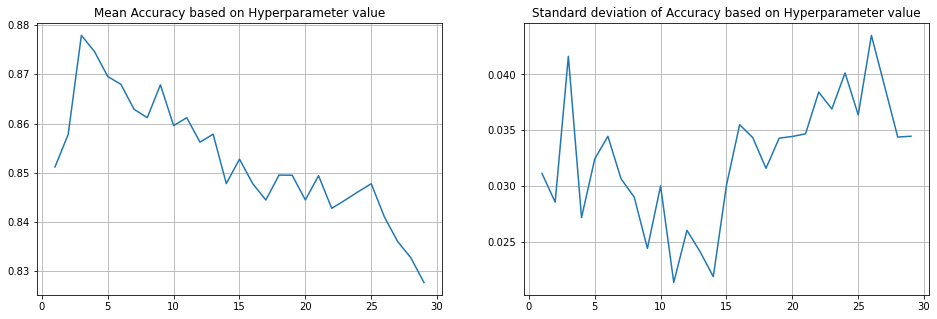

In [21]:
#Tuning model Hyperparameters
k_scores=[]
k_var=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    k_k= cross_validate(knn, x_train_sel, y_train_sel, cv=10)
    k_scores.append(np.mean(k_k['test_score']))
    k_var.append(np.std(k_k['test_score']))
f=plt.figure(figsize=(16,5))
ax=f.add_subplot(1,2,1)
plt.plot(range(1,30),k_scores)
plt.title('Mean Accuracy based on Hyperparameter value')
plt.grid()
ax=f.add_subplot(1,2,2)
plt.plot(range(1,30),k_var)
plt.title('Standard deviation of Accuracy based on Hyperparameter value')
plt.grid()
plt.show()

In [15]:
#Make new models and train on whole training set
model1=GaussianNB()
model2=LogisticRegression(solver='liblinear')
model3=RandomForestClassifier(random_state=0, max_depth=9)
model4=KNeighborsClassifier(n_neighbors=9)
model5=DecisionTreeClassifier(random_state=0,max_depth=5)
model6=XGBClassifier(use_label_encoder=False, max_depth=7,eval_metric='logloss')
models=[model1,model2,model3,model4,model5,model6]

In [16]:
#Test on holdout set with selected features
for i in models:
    i.fit(x_train_sel, y_train_sel)
    y_predict=i.predict(x_test_sel)
    cm=confusion_matrix(y_test_sel,y_predict)
    print('Confusion Matrix for '+ str(i).split('(')[0]+ ':\n',cm)
    print('Sensitivity: {}%'.format(np.round(100*cm[1,1]/(cm[1,1]+cm[1,0]),3)))
    print('Specificity: {}%'.format(np.round(100*cm[0,0]/(cm[0,0]+cm[0,1]),3)))
    print("Negative Predictive Value: {}%".format(np.round(100*cm[0,0]/(cm[0,0]+cm[1,0]),3)))
    print('Accuracy: {}%'.format(np.round(100*(cm[0,0]+cm[1,1])/np.sum(cm),3)))
    print('\n')

Confusion Matrix for GaussianNB:
 [[40 12]
 [ 4 11]]
Sensitivity: 73.333%
Specificity: 76.923%
Negative Predictive Value: 90.909%
Accuracy: 76.119%


Confusion Matrix for LogisticRegression:
 [[51  1]
 [ 0 15]]
Sensitivity: 100.0%
Specificity: 98.077%
Negative Predictive Value: 100.0%
Accuracy: 98.507%


Confusion Matrix for RandomForestClassifier:
 [[50  2]
 [ 4 11]]
Sensitivity: 73.333%
Specificity: 96.154%
Negative Predictive Value: 92.593%
Accuracy: 91.045%


Confusion Matrix for KNeighborsClassifier:
 [[46  6]
 [ 4 11]]
Sensitivity: 73.333%
Specificity: 88.462%
Negative Predictive Value: 92.0%
Accuracy: 85.075%


Confusion Matrix for DecisionTreeClassifier:
 [[47  5]
 [ 3 12]]
Sensitivity: 80.0%
Specificity: 90.385%
Negative Predictive Value: 94.0%
Accuracy: 88.06%


Confusion Matrix for XGBClassifier:
 [[52  0]
 [ 4 11]]
Sensitivity: 73.333%
Specificity: 100.0%
Negative Predictive Value: 92.857%
Accuracy: 94.03%




In [17]:
#Test on holdout set without selected features for comparison
for i in models:
    i.fit(x_train, y_train)
    y_predict=i.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    print('Confusion Matrix for '+ str(i).split('(')[0]+ ':\n',cm)
    print('Sensitivity: {}%'.format(np.round(100*cm[1,1]/(cm[1,1]+cm[1,0]),3)))
    print('Specificity: {}%'.format(np.round(100*cm[0,0]/(cm[0,0]+cm[0,1]),3)))
    print("Negative Predictive Value: {}%".format(np.round(100*cm[0,0]/(cm[0,0]+cm[1,0]),3)))
    print('Accuracy: {}%'.format(np.round(100*(cm[0,0]+cm[1,1])/np.sum(cm),3)))
    print('\n')

Confusion Matrix for GaussianNB:
 [[44  8]
 [ 6  9]]
Sensitivity: 60.0%
Specificity: 84.615%
Negative Predictive Value: 88.0%
Accuracy: 79.104%


Confusion Matrix for LogisticRegression:
 [[28 24]
 [ 7  8]]
Sensitivity: 53.333%
Specificity: 53.846%
Negative Predictive Value: 80.0%
Accuracy: 53.731%


Confusion Matrix for RandomForestClassifier:
 [[52  0]
 [ 4 11]]
Sensitivity: 73.333%
Specificity: 100.0%
Negative Predictive Value: 92.857%
Accuracy: 94.03%


Confusion Matrix for KNeighborsClassifier:
 [[45  7]
 [10  5]]
Sensitivity: 33.333%
Specificity: 86.538%
Negative Predictive Value: 81.818%
Accuracy: 74.627%


Confusion Matrix for DecisionTreeClassifier:
 [[47  5]
 [ 3 12]]
Sensitivity: 80.0%
Specificity: 90.385%
Negative Predictive Value: 94.0%
Accuracy: 88.06%


Confusion Matrix for XGBClassifier:
 [[52  0]
 [ 1 14]]
Sensitivity: 93.333%
Specificity: 100.0%
Negative Predictive Value: 98.113%
Accuracy: 98.507%




In [18]:
#Plot ROC Curve and calculate AUC
#If mode is set to 'sel' then the ROC Curve is based on the feature selection data
def roc_analysis(model,mode='not_sel'):
    if mode=='sel':
        x_predict=x_test_sel
        y_true=y_test_sel
        model.fit(x_train_sel, y_train_sel)
    else:
        x_predict=x_test
        y_true=y_test
        model.fit(x_train, y_train)
    y_predict=model.predict_proba(x_predict)[:,1]
    fpr, tpr, thresholds =roc_curve(y_true,y_predict,pos_label=1)
    auc_score=roc_auc_score(y_true,y_predict)
    plt.figure(figsize=(7,6))
    plt.plot(1-tpr, 1-fpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.007])
    plt.xlabel('False Negative Rate (Miss Rate)')
    plt.ylabel('True Negative Rate (Specificity)')
    plt.title('Receiver Operating Characteristic for '+str(model).split('(')[0]+' (AUC = %0.3f)' % auc_score)
    plt.legend(loc="lower right")

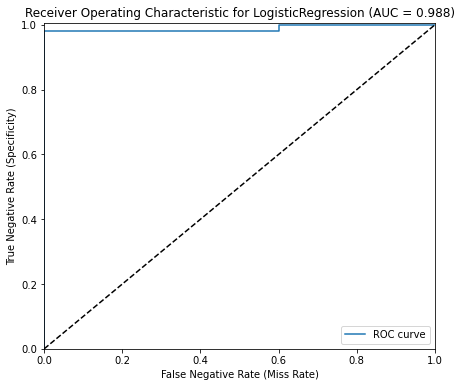

In [19]:
roc_analysis(model2, mode="sel")

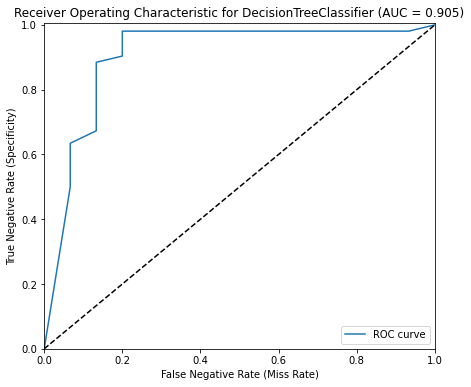

In [20]:
roc_analysis(model5, mode="sel")

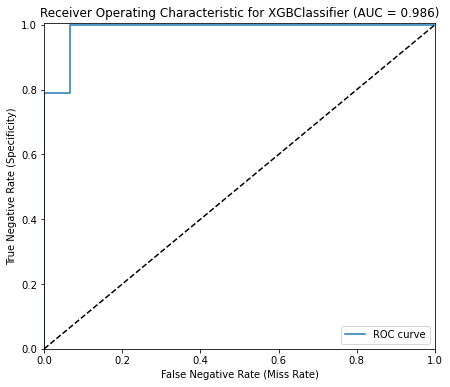

In [23]:
roc_analysis(model6)